In [2]:
import os
import cv2
import warnings
import numpy as np
from PIL import Image
from tqdm import tqdm
import matplotlib.pyplot as plt
from joblib import Parallel, delayed
warnings.filterwarnings('ignore')
DAT_PATH = 'dataset/'
TARGET = 'MAP'
random_seed = 42
IMG_WIDTH = 256
IMG_HEIGHT = 256
n_split= 0.75

In [3]:
IMPATH = DAT_PATH+'ISIC2018_Task1-2_Training_Input/'
SEGPATH = DAT_PATH+'ISIC2018_Task1_Training_GroundTruth/' 
ATRPATH = DAT_PATH+'ISIC2018_Task2_Training_GroundTruth_v3/'



INPATH = DAT_PATH+'IMAGES/'
OUPATH = DAT_PATH+TARGET+'/'

filenames = ['ISIC_0000111.jpg','ISIC_0014867.jpg','ISIC_0015625.jpg','ISIC_0010332.jpg','ISIC_0000013.jpg']
filenames = ['ISIC_0000281.jpg','ISIC_0009940.jpg','ISIC_0014826.jpg']


In [4]:
def create_folder(path,name):
    import os
    try:
        path=path+name
        os.mkdir(path)
    except OSError:
        print ("Exist or Failed the directory %s" % path)
    else:
        print ("Successfully created the directory %s " % path)

In [5]:
create_folder(OUPATH,'')
create_folder(INPATH,'')
create_folder('images','')
create_folder('results','')
create_folder('results/','output_'+TARGET)
create_folder('results/','checkpoints_'+TARGET)

Exist or Failed the directory dataset/MAP/
Exist or Failed the directory dataset/IMAGES/
Exist or Failed the directory images
Exist or Failed the directory results
Exist or Failed the directory results/output_MAP
Exist or Failed the directory results/checkpoints_MAP


In [6]:
imgurls = os.listdir(IMPATH)

imgurls[0:3]


['ISIC_0011212.jpg', 'ISIC_0010602.jpg', 'ISIC_0000199.jpg']

In [7]:
filenames

['ISIC_0000281.jpg', 'ISIC_0009940.jpg', 'ISIC_0014826.jpg']

100%|██████████| 3/3 [00:04<00:00,  1.51s/it]


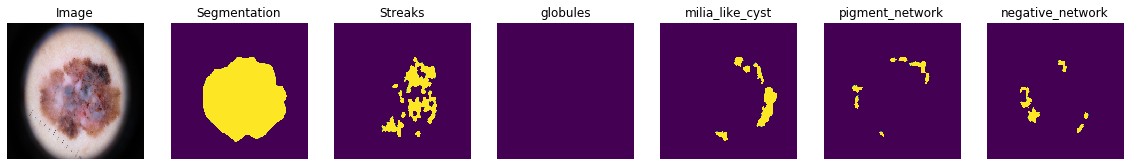

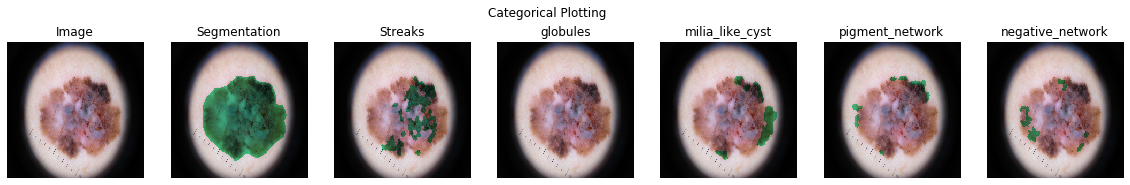

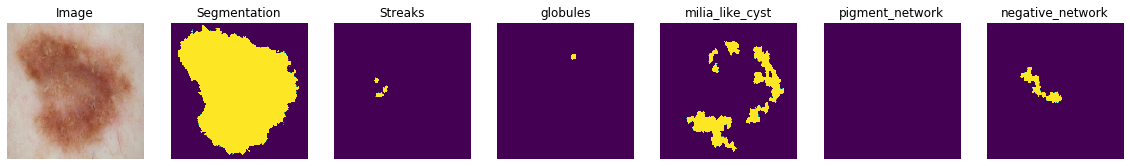

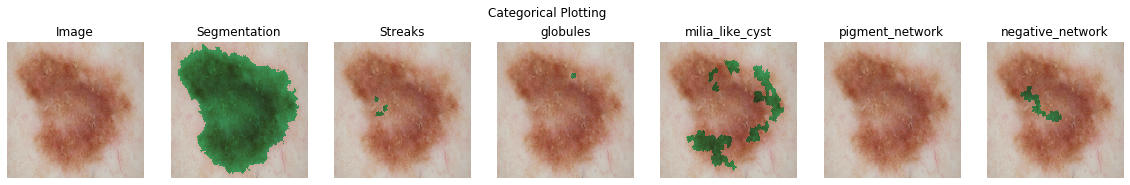

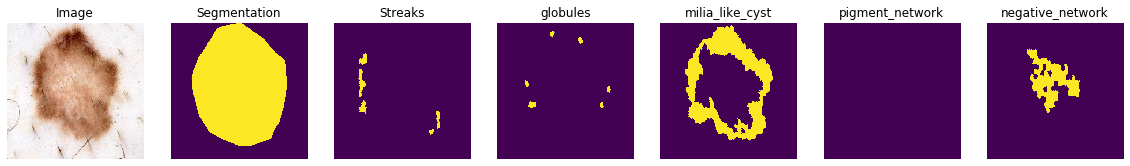

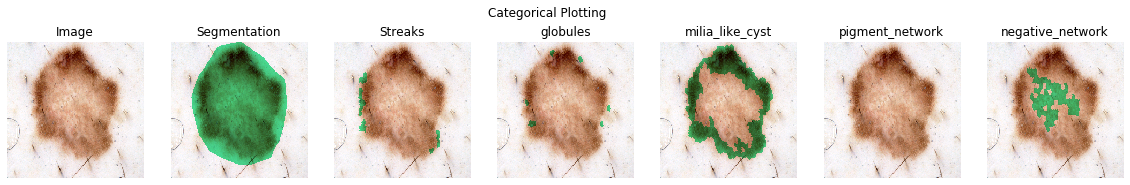

In [12]:
contador = 0
from tqdm import tqdm
for filename in tqdm(filenames):
    if(contador>2):
        break
    
    Bandera = False
    img = cv2. imread(IMPATH+filename)
    seg = cv2. imread(SEGPATH+filename[:12]+'_segmentation.png')
    streak = cv2.imread(ATRPATH+filename[:12]+'_attribute_streaks.png')
    globules = cv2.imread(ATRPATH+filename[:12]+'_attribute_globules.png')
    milia =  cv2.imread(ATRPATH+filename[:12]+'_attribute_milia_like_cyst.png')
    pigment = cv2.imread(ATRPATH+filename[:12]+'_attribute_pigment_network.png')
    negative = cv2.imread(ATRPATH+filename[:12]+'_attribute_negative_network.png')

    
    if(TARGET == 'MAP'):
        map_image = np.zeros((img.shape[0],img.shape[1],6), dtype=np.uint8)
        idx=0
        map_image[seg[:,:,idx]>0,0]=255 
        map_image[globules[:,:,idx]>0,1] = 255
        map_image[milia[:,:,idx]>0,2] = 255    
        map_image[pigment[:,:,idx]>0,3] = 255 
        map_image[streak[:,:,idx]> 0,4] = 255
        map_image[negative[:,:,idx]>0,5] = 255
        
        cantidad_capas = 0

        if(seg[:,:,1].sum() >0):
            cantidad_capas +=1
        if(globules[:,:,1].sum() >0):
            cantidad_capas +=1
        if(milia[:,:,1].sum() >0):
            cantidad_capas +=1
        if(pigment[:,:,1].sum() >0):
            cantidad_capas +=1
        if(streak[:,:,1].sum() >0):
            cantidad_capas +=1
        if(negative[:,:,1].sum() >0):
            cantidad_capas +=1

        if(cantidad_capas >4):
            Bandera = True

        img = cv2.resize(img, (IMG_HEIGHT, IMG_WIDTH))
        map_image1 = cv2.resize(map_image[:,:,0:3], (IMG_HEIGHT, IMG_WIDTH))#, interpolation = cv2.INTER_AREA )
        map_image2 = cv2.resize(map_image[:,:,3:], (IMG_HEIGHT, IMG_WIDTH) )#,interpolation = cv2.INTER_AREA )
        map_image =np.concatenate((map_image1, map_image2), axis=2)
        map_image = np.array(map_image,dtype=np.uint8)
             
        if(Bandera):
            cv2.imwrite('images_poster/'+TARGET+'_'+filename[:12]+'_1.png',cv2.cvtColor(map_image[:,:,0:3], cv2.COLOR_BGR2RGB))
            cv2.imwrite('images_poster/'+TARGET+'_'+filename[:12]+'_2.png',cv2.cvtColor(map_image[:,:,3:], cv2.COLOR_BGR2RGB))

            map_image1 = plt.imread('images_poster/'+TARGET+'_'+filename[:12]+'_1.png')
            map_image2 = plt.imread('images_poster/'+TARGET+'_'+filename[:12]+'_2.png')
            map_image =np.concatenate((map_image1, map_image2), axis=2)
        
    else:
        
        map_image = np.zeros((img.shape[0],img.shape[1],1), dtype=np.uint8)
        
        map_image[seg[:,:,1]>0,:]=255 
        img = cv2.resize(img, (IMG_HEIGHT, IMG_WIDTH))
        map_image = cv2.resize(map_image, (IMG_HEIGHT, IMG_WIDTH))

    if(TARGET == 'MAP'):
        if(Bandera):
            fig, axs = plt.subplots(1, 7, figsize=(20, 3), sharey=True)
            axs[0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
            axs[0].set_title('Image')
            axs[0].axis('off')
            axs[1].imshow(map_image[:,:,0])
            axs[1].set_title('Segmentation')
            axs[1].axis('off')
            axs[2].imshow(map_image[:,:,1])
            axs[2].set_title('Streaks')
            axs[2].axis('off')
            axs[3].imshow(map_image[:,:,2])
            axs[3].set_title('globules')
            axs[3].axis('off')
            axs[4].imshow(map_image[:,:,3])
            axs[4].set_title('milia_like_cyst')
            axs[4].axis('off')
            axs[5].imshow(map_image[:,:,4])
            axs[5].set_title('pigment_network')
            axs[5].axis('off')
            axs[6].imshow(map_image[:,:,5])
            axs[6].set_title('negative_network')
            axs[6].axis('off')
            #fig.suptitle('Categorical Plotting')
            plt.savefig('images_poster/'+TARGET+'_'+filename)
            contador+=1

            fig, axs = plt.subplots(1, 7, figsize=(20, 3), sharey=True)
            axs[0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
            axs[0].set_title('Image')
            axs[0].axis('off')
            idx_aux = 0
            imgaux = img.copy()
            (r,g,b)=(0.3,0.9,0.6)
            img = cv2.cvtColor(imgaux, cv2.COLOR_BGR2RGB)
            aux = img.copy()
            aux[:,:,0] = img[:,:,0]*(1-(map_image[:,:,idx_aux]>0))+img[:,:,0]*(map_image[:,:,idx_aux]>0)*r
            aux[:,:,1] = img[:,:,1]*(1-(map_image[:,:,idx_aux]>0))+img[:,:,1]*(map_image[:,:,idx_aux]>0)*g
            aux[:,:,2] = img[:,:,2]*(1-(map_image[:,:,idx_aux]>0))+img[:,:,2]*(map_image[:,:,idx_aux]>0)*b
            axs[idx_aux+1].imshow(aux)
            axs[1].set_title('Segmentation')
            axs[1].axis('off')
            idx_aux = 1
            aux = img.copy()
            aux[:,:,0] = img[:,:,0]*(1-(map_image[:,:,idx_aux]>0))+img[:,:,0]*(map_image[:,:,idx_aux]>0)*r
            aux[:,:,1] = img[:,:,1]*(1-(map_image[:,:,idx_aux]>0))+img[:,:,1]*(map_image[:,:,idx_aux]>0)*g
            aux[:,:,2] = img[:,:,2]*(1-(map_image[:,:,idx_aux]>0))+img[:,:,2]*(map_image[:,:,idx_aux]>0)*b
            axs[idx_aux+1].imshow(aux)
            axs[2].set_title('Streaks')
            axs[2].axis('off')
            idx_aux = 2
            aux = img.copy()
            aux[:,:,0] = img[:,:,0]*(1-(map_image[:,:,idx_aux]>0))+img[:,:,0]*(map_image[:,:,idx_aux]>0)*r
            aux[:,:,1] = img[:,:,1]*(1-(map_image[:,:,idx_aux]>0))+img[:,:,1]*(map_image[:,:,idx_aux]>0)*g
            aux[:,:,2] = img[:,:,2]*(1-(map_image[:,:,idx_aux]>0))+img[:,:,2]*(map_image[:,:,idx_aux]>0)*b
            axs[idx_aux+1].imshow(aux)
            axs[3].set_title('globules')
            axs[3].axis('off')
            idx_aux = 3
            aux = img.copy()
            aux[:,:,0] = img[:,:,0]*(1-(map_image[:,:,idx_aux]>0))+img[:,:,0]*(map_image[:,:,idx_aux]>0)*r
            aux[:,:,1] = img[:,:,1]*(1-(map_image[:,:,idx_aux]>0))+img[:,:,1]*(map_image[:,:,idx_aux]>0)*g
            aux[:,:,2] = img[:,:,2]*(1-(map_image[:,:,idx_aux]>0))+img[:,:,2]*(map_image[:,:,idx_aux]>0)*b
            axs[idx_aux+1].imshow(aux)
            axs[4].set_title('milia_like_cyst')
            axs[4].axis('off')
            idx_aux = 4
            aux = img.copy()
            aux[:,:,0] = img[:,:,0]*(1-(map_image[:,:,idx_aux]>0))+img[:,:,0]*(map_image[:,:,idx_aux]>0)*r
            aux[:,:,1] = img[:,:,1]*(1-(map_image[:,:,idx_aux]>0))+img[:,:,1]*(map_image[:,:,idx_aux]>0)*g
            aux[:,:,2] = img[:,:,2]*(1-(map_image[:,:,idx_aux]>0))+img[:,:,2]*(map_image[:,:,idx_aux]>0)*b
            axs[idx_aux+1].imshow(aux)
            axs[5].set_title('pigment_network')
            axs[5].axis('off')
            idx_aux = 5
            aux = img.copy()
            aux[:,:,0] = img[:,:,0]*(1-(map_image[:,:,idx_aux]>0))+img[:,:,0]*(map_image[:,:,idx_aux]>0)*r
            aux[:,:,1] = img[:,:,1]*(1-(map_image[:,:,idx_aux]>0))+img[:,:,1]*(map_image[:,:,idx_aux]>0)*g
            aux[:,:,2] = img[:,:,2]*(1-(map_image[:,:,idx_aux]>0))+img[:,:,2]*(map_image[:,:,idx_aux]>0)*b
            axs[idx_aux+1].imshow(aux)
            axs[6].set_title('negative_network')
            axs[6].axis('off')
            fig.suptitle('Categorical Plotting')
            plt.savefig('images_poster/'+TARGET+'_'+filename[:12]+'_3.png')
    else:
        
        fig, axs = plt.subplots(1, 2, figsize=(10, 3), sharey=True)
        axs[0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        axs[0].set_title('Image')
        axs[1].imshow(map_image)
        axs[1].set_title('Segmentation')
        #fig.suptitle('Categorical Plotting')
        plt.savefig('images_poster/'+TARGET+'_'+filename)
    


In [ ]:
map_image[:,:,idx].max()

In [ ]:
map_image[:,:,0:3].shape

In [ ]:
def create_map(filename):
    # LECTURA DE IMAGEN
    img = cv2. imread(IMPATH+filename)
    if (img is None) or (len(img)==0):
        return 
    # LECTURA DE MELANOMA SEGMENT
    seg = cv2. imread(SEGPATH+filename[:12]+'_segmentation.png')
    if (seg is None) or (len(seg)==0):
        return 
    
    # LECTURA DE MASCARAS
    streak = cv2.imread(ATRPATH+filename[:12]+'_attribute_streaks.png')
    globules = cv2.imread(ATRPATH+filename[:12]+'_attribute_globules.png')
    milia =  cv2.imread(ATRPATH+filename[:12]+'_attribute_milia_like_cyst.png')
    pigment = cv2.imread(ATRPATH+filename[:12]+'_attribute_pigment_network.png')
    negative = cv2.imread(ATRPATH+filename[:12]+'_attribute_negative_network.png')
    
    cantidad_capas = 0

    if(seg[:,:,1].sum() >0):
        cantidad_capas +=1
    if(globules[:,:,1].sum() >0):
        cantidad_capas +=1
    if(milia[:,:,1].sum() >0):
        cantidad_capas +=1
    if(pigment[:,:,1].sum() >0):
        cantidad_capas +=1
    if(streak[:,:,1].sum() >0):
        cantidad_capas +=1
    if(negative[:,:,1].sum() >0):
        cantidad_capas +=1

    if(cantidad_capas <3):
        return
    if(TARGET == 'MAP'):
        map_image = np.zeros((img.shape[0],img.shape[1],6), dtype=np.uint8)
        
        map_image[seg[:,:,1]>0,0]=255 
        map_image[globules[:,:,1]>0,1] = 255
        map_image[milia[:,:,1]>0,2] = 255    
        map_image[pigment[:,:,1]>0,3] = 255 
        map_image[streak[:,:,1]> 0,4] = 255
        map_image[negative[:,:,1]>0,5] = 255
        img = cv2.resize(img, (IMG_HEIGHT, IMG_WIDTH))
        map_image1 = cv2.resize(map_image[:,:,0:3], (IMG_HEIGHT, IMG_WIDTH))
        map_image2 = cv2.resize(map_image[:,:,3:], (IMG_HEIGHT, IMG_WIDTH))
        map_image =np.concatenate((map_image1, map_image2), axis=2)
        map_image = np.array(map_image,dtype=np.uint8)
        cv2.imwrite(OUPATH+filename[:12]+'_1.png',cv2.cvtColor(map_image[:,:,0:3], cv2.COLOR_BGR2RGB))
        cv2.imwrite(OUPATH+filename[:12]+'_2.png',cv2.cvtColor(map_image[:,:,3:], cv2.COLOR_BGR2RGB))
        cv2.imwrite(INPATH+filename,img)

    else:
        
        map_image = np.zeros((img.shape[0],img.shape[1],1), dtype=np.uint8)
        
        map_image[seg[:,:,1]>0,:]=255 
        img = cv2.resize(img, (IMG_HEIGHT, IMG_WIDTH))
        map_image = cv2.resize(map_image, (IMG_HEIGHT, IMG_WIDTH))
        cv2.imwrite(OUPATH+filename,cv2.cvtColor(map_image, cv2.COLOR_BGR2RGB))
        cv2.imwrite(INPATH+filename,img)

    
    return #
#[img,map_image]

In [ ]:
imgurls = os.listdir(IMPATH)
results = Parallel(n_jobs=16)(delayed(create_map)(filename) for filename in tqdm(imgurls))
del results
print('Total images '+':', len(imgurls))
print('Total map    '+':', len(imgurls))